In [1]:
import numpy as np
import matplotlib.pyplot as plt

import camutils
import meshutils
import selectpoints
import visutils
import reconstruct
import pickle
import cv2
import scipy
import trimesh

In [2]:
grab_num = 5
col_thresh = 0.2 #decrease to be more sensitive
code_thresh = 0.0002 #increase to be more sensitive

colprefixL = f"teapot/grab_{grab_num}_u/color_C0_"
colprefixR = f"teapot/grab_{grab_num}_u/color_C1_"
imprefixL  = f"teapot/grab_{grab_num}_u/frame_C0_"
imprefixR  = f"teapot/grab_{grab_num}_u/frame_C1_"

In [3]:
# calibrate cameras
fid = open('../calibration.pickle', 'rb')
intrinsics = pickle.load(fid)
f = (intrinsics['fx'] + intrinsics['fy'])/2
c = np.array([[intrinsics['cx'], intrinsics['cy']]]).T

camL = camutils.Camera(f=f, c=c, t=np.array([[0,0,0]]).T, R=camutils.makerotation(0,0,0))
camR = camutils.Camera(f=f, c=c, t=np.array([[0,0,0]]).T, R=camutils.makerotation(0,0,0))

imgL = plt.imread('calib_jpg_u/frame_C0_01.jpg')
ret, cornersL = cv2.findChessboardCorners(imgL, (8,6), None)
pts2L = cornersL.squeeze().T

imgR = plt.imread('calib_jpg_u/frame_C1_01.jpg')
ret, cornersR = cv2.findChessboardCorners(imgR, (8,6), None)
pts2R = cornersR.squeeze().T

pts3 = np.zeros((3,6*8))
yy,xx = np.meshgrid(np.arange(8),np.arange(6))
pts3[0,:] = 2.8*xx.reshape(1,-1)
pts3[1,:] = 2.8*yy.reshape(1,-1)

initL = np.array([0,0,50,0,0,-2]) 
initR = np.array([0,0,50,0,0,-2]) 

camL.update_extrinsics(initL)
camR.update_extrinsics(initR)


camL = camutils.calibratePose(pts3, pts2L, camL, initL)
camR = camutils.calibratePose(pts3, pts2R, camR, initR)

In [4]:
col_maskL = reconstruct.color_mask(colprefixL, col_thresh)

H_L, H_L_mask = camutils.decode(imprefixL,0,code_thresh)
V_L, V_L_mask = camutils.decode(imprefixL,20,code_thresh)
C_L = (H_L * H_L_mask + 1024*V_L * V_L_mask)

col_maskR = reconstruct.color_mask(colprefixR, col_thresh)

H_R, H_R_mask = camutils.decode(imprefixR,0,code_thresh)
V_R, V_R_mask = camutils.decode(imprefixR,20,code_thresh)
C_R = (H_R * H_R_mask + 1024*V_R * V_R_mask)

loading( 0 1 )( 2 3 )( 4 5 )( 6 7 )( 8 9 )( 10 11 )( 12 13 )( 14 15 )( 16 17 )( 18 19 )

loading( 20 21 )( 22 23 )( 24 25 )( 26 27 )( 28 29 )( 30 31 )( 32 33 )( 34 35 )( 36 37 )( 38 39 )

loading( 0 1 )( 2 3 )( 4 5 )( 6 7 )( 8 9 )( 10 11 )( 12 13 )( 14 15 )( 16 17 )( 18 19 )

loading( 20 21 )( 22 23 )( 24 25 )( 26 27 )( 28 29 )( 30 31 )( 32 33 )( 34 35 )( 36 37 )( 38 39 )



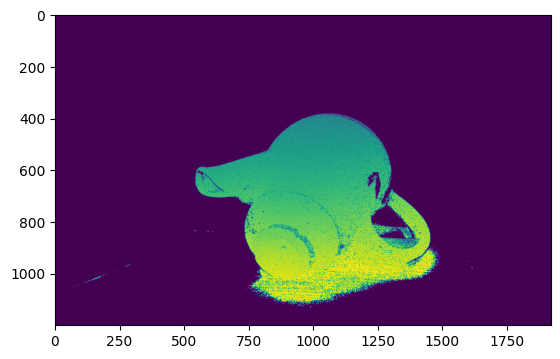

In [5]:
plt.imshow(C_L * col_maskL)

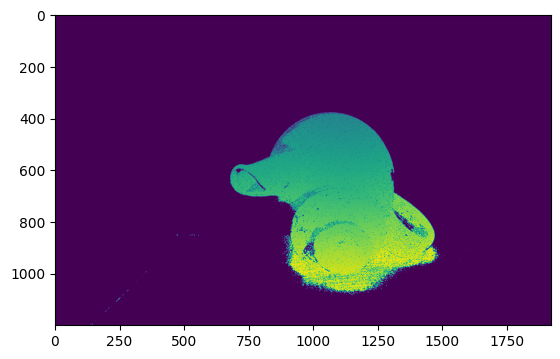

In [6]:
plt.imshow(C_R * col_maskR)

In [7]:
#retry reconstruction
pts2L, pts2R, pts3, col = reconstruct.reconstruct(colprefixL, colprefixR, col_thresh, imprefixL, imprefixR, code_thresh, camL, camR)

print(col.shape)
print(pts2L.shape)

loading( 0 1 )( 2 3 )( 4 5 )( 6 7 )( 8 9 )( 10 11 )( 12 13 )( 14 15 )( 16 17 )( 18 19 )

loading( 20 21 )( 22 23 )( 24 25 )( 26 27 )( 28 29 )( 30 31 )( 32 33 )( 34 35 )( 36 37 )( 38 39 )

loading( 0 1 )( 2 3 )( 4 5 )( 6 7 )( 8 9 )( 10 11 )( 12 13 )( 14 15 )( 16 17 )( 18 19 )

loading( 20 21 )( 22 23 )( 24 25 )( 26 27 )( 28 29 )( 30 31 )( 32 33 )( 34 35 )( 36 37 )( 38 39 )

(87347, 3)
(2, 87347)


Text(0, 0.5, 'Y')

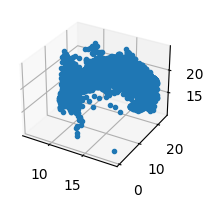

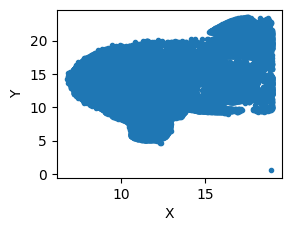

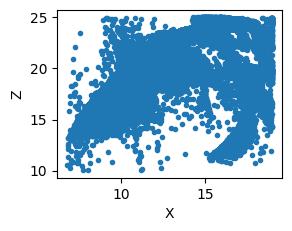

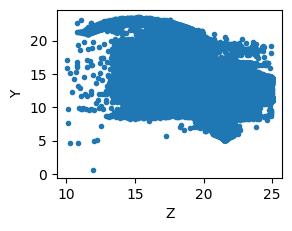

In [8]:
x1, x2, y1, y2, z1, z2 = [3, 19, 0, 26, 10, 25]

x_in = np.logical_and(pts3[0, :] > x1, pts3[0, :] < x2)
y_in = np.logical_and(pts3[1, :] > y1, pts3[1, :] < y2)
z_in = np.logical_and(pts3[2, :] > z1, pts3[2, :] < z2)

kept = np.logical_and(np.logical_and(x_in, y_in), z_in)

pts3 = pts3.T[kept].T
pts2L = pts2L.T[kept].T
pts2R = pts2R.T[kept].T
col = col[kept]

pts3x = pts3[0,:]
pts3y = pts3[1,:]
pts3z = pts3[2,:]

# Add your visualization code here.  As we have done previously it is good to visualize different
# 2D projections XY, XZ, YZ and well as a 3D version
fig = plt.figure()
ax = fig.add_subplot(2,2,1,projection='3d')
ax.plot(pts3x,pts3y, pts3z,'.')

fig = plt.figure()
ax = fig.add_subplot(2,2,2)
ax.plot(pts3x,pts3y,'.')
ax.set_xlabel("X")
ax.set_ylabel("Y")

fig = plt.figure()
ax = fig.add_subplot(2,2,3)
ax.plot(pts3x,pts3z,'.')
ax.set_xlabel("X")
ax.set_ylabel("Z")

fig = plt.figure()
ax = fig.add_subplot(2,2,4)
ax.plot(pts3z,pts3y,'.')
ax.set_xlabel("Z")
ax.set_ylabel("Y")

In [9]:
def trianglePruning(pts2L, pts2R, pts3, trithresh, side, col):
    tri = None
    if side:
        tri = scipy.spatial.Delaunay(pts2R.T).simplices
    else:
        tri = scipy.spatial.Delaunay(pts2L.T).simplices
    if pts3.shape[1] == 3:
        pts3 = pts3.T

    tripts3 = pts3.T[tri]
    
    edge1 = np.sum(np.square(tripts3[:,0] - tripts3[:,1]), axis = -1)
    edge2 = np.sum(np.square(tripts3[:,2] - tripts3[:,1]), axis = -1)
    edge3 = np.sum(np.square(tripts3[:,0] - tripts3[:,2]), axis = -1)
    
    good_tri_idx = np.logical_and(np.logical_and(edge1 < trithresh **2, edge2 < trithresh ** 2), edge3 < trithresh ** 2)
    good_tri = tri[good_tri_idx]

    good_pts3_idx = np.unique(good_tri)
    good_pts3 = pts3.T[good_pts3_idx]

    mp = np.empty(pts3.shape[1])
    mp[good_pts3_idx] = np.arange(0, good_pts3_idx.shape[0])
    good_tri = mp[good_tri].astype(int)

    good_pts2L = pts2L.T[good_pts3_idx].T
    good_pts2R = pts2R.T[good_pts3_idx].T
    col = col[good_pts3_idx]

    return good_pts2L, good_pts2R, good_pts3, good_tri, col

In [10]:
trithresh = 0.5

pruned_pts2L, pruned_pts2R, pruned_pts3, pruned_tri, col = trianglePruning(pts2L, pts2R, pts3, trithresh, 0, col)
#pruned_pts2L, pruned_pts2R, pruned_pts3, pruned_tri = trianglePruning(pruned_pts2L, pruned_pts2R, pruned_pts3, trithresh, 1)

mesh = trimesh.Trimesh(vertices=pruned_pts3,faces=pruned_tri[:,[0,2,1]])
mesh.show()

Text(0, 0.5, 'Y')

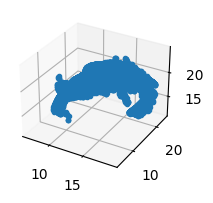

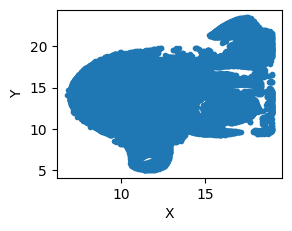

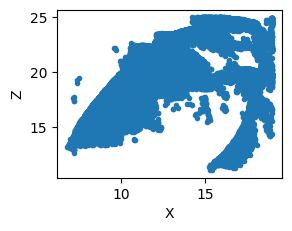

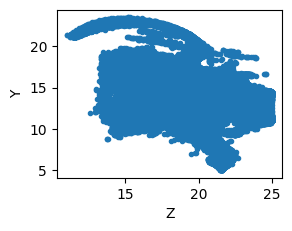

In [11]:
fig = plt.figure()
ax = fig.add_subplot(2,2,1,projection='3d')
ax.plot(pruned_pts3[:,0],pruned_pts3[:,1], pruned_pts3[:,2],'.')

fig = plt.figure()
ax = fig.add_subplot(2,2,2)
ax.plot(pruned_pts3[:,0],pruned_pts3[:,1],'.')
ax.set_xlabel("X")
ax.set_ylabel("Y")

fig = plt.figure()
ax = fig.add_subplot(2,2,3)
ax.plot(pruned_pts3[:,0],pruned_pts3[:,2],'.')
ax.set_xlabel("X")
ax.set_ylabel("Z")

fig = plt.figure()
ax = fig.add_subplot(2,2,4)
ax.plot(pruned_pts3[:,2],pruned_pts3[:,1],'.')
ax.set_xlabel("Z")
ax.set_ylabel("Y")

In [12]:
n = pruned_pts3.shape[0]

for _ in range(4):

    neighbors = np.zeros((n,3))
    neighbor_counts = np.zeros(n)
    for simplex in pruned_tri:
        for i in range(3):
            v = simplex[i]

            for j in range(3):
                if i != j:
                    u = simplex[j]
                    u_xyz = pruned_pts3[u]
                    neighbors[v] += u_xyz
                    neighbor_counts[v] += 1
    pruned_pts3 = np.divide(neighbors, np.stack([neighbor_counts] * 3).T )

mesh = trimesh.Trimesh(vertices=pruned_pts3,faces=pruned_tri[:,[0,2,1]])
mesh.show()

Text(0, 0.5, 'Y')

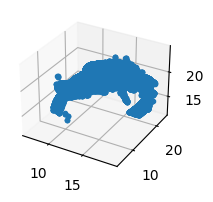

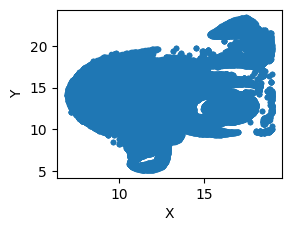

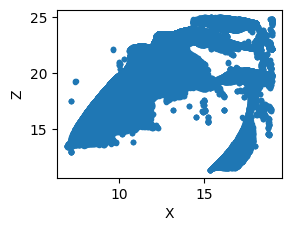

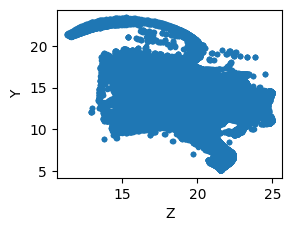

In [13]:
fig = plt.figure()
ax = fig.add_subplot(2,2,1,projection='3d')
ax.plot(pruned_pts3[:,0],pruned_pts3[:,1], pruned_pts3[:,2],'.')

fig = plt.figure()
ax = fig.add_subplot(2,2,2)
ax.plot(pruned_pts3[:,0],pruned_pts3[:,1],'.')
ax.set_xlabel("X")
ax.set_ylabel("Y")

fig = plt.figure()
ax = fig.add_subplot(2,2,3)
ax.plot(pruned_pts3[:,0],pruned_pts3[:,2],'.')
ax.set_xlabel("X")
ax.set_ylabel("Z")

fig = plt.figure()
ax = fig.add_subplot(2,2,4)
ax.plot(pruned_pts3[:,2],pruned_pts3[:,1],'.')
ax.set_xlabel("Z")
ax.set_ylabel("Y")

In [14]:
meshutils.writeply(pruned_pts3.T, col.T, pruned_tri, f"{grab_num}.ply")